# Tugas 2 : Menghitung Jarak

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
job_data = pd.read_csv('https://raw.githubusercontent.com/Rifqi-05/pendata/main/Job_Placement_Data.csv')
job_data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [3]:
# Show all columns from dataframe
job_data.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [4]:
job_data[['gender', 'status']].head(10)

,gender,status
0,M,Placed
1,M,Placed
2,M,Placed
3,M,Not Placed
4,M,Placed
5,M,Not Placed
6,F,Not Placed
7,M,Placed
8,M,Placed
9,M,Not Placed


In [5]:
# Gender code
gender_female = "F"
gender_male = "M"

# binary value
value_one = 1
value_zero = 0

def change_gender_to_binary(gender):
    return value_one if gender == gender_male else value_zero

In [6]:
# lunch code
status_placed = "Placed"
status_not_placed = "Not placed"

# binary value
value_one = 1
value_zero = 0

def change_lunch_to_binary(status):
    return value_one if status == status_not_placed else value_zero

In [7]:
# Update all values
job_data["gender"] = job_data["gender"].apply(change_gender_to_binary)
job_data["status"] = job_data["status"].apply(change_status_to_binary)

NameError: ignored

In [8]:
job_data[['gender', 'status']].head(10)

,gender,status
0,1,Placed
1,1,Placed
2,1,Placed
3,1,Not Placed
4,1,Placed
5,1,Not Placed
6,0,Not Placed
7,1,Placed
8,1,Placed
9,1,Not Placed


In [9]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

PROBALITY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [10]:
def get_series(job_data, idx, series):
    return job_data.loc[(idx), series]

In [11]:
def dissimilarity_dataset(job_data, series_index = [], series = []):
    first_series = get_series(job_data, series_index[0], series)
    second_series = get_series(job_data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [12]:
dissimilarity_dataset(job_data, [1,2], ["gender", "status"]).T

,1,2
gender,1,1
status,Placed,Placed


In [13]:
job_data.loc[0:4, ["gender", "status"]]

,gender,status
0,1,Placed
1,1,Placed
2,1,Placed
3,1,Not Placed
4,1,Placed


In [14]:
def count_probality_value(job_data, start_index = 0, last_index = 1):

    PROBALITY_VALUE = {"q" : 0, "r" : 0, "s" : 0, "t" : 0}

    column_range = job_data.shape[1]

    for column in range(column_range):
        for value in PROBALITY_TABLE_VALUE:
            item = list((tuple(job_data.loc[(start_index):(last_index), job_data.columns[column]]) == PROBALITY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    PROBALITY_VALUE["q"] += 1
                if item[1] == "r":
                    PROBALITY_VALUE["r"] += 1
                if item[1] == "s":
                    PROBALITY_VALUE["s"] += 1
                if item[1] == "t":
                    PROBALITY_VALUE["t"] += 1

    return PROBALITY_VALUE

In [15]:
# dimensi (1,2)
dimensi_1_2 = dissimilarity_dataset(job_data, [1,2], ["gender", "status"])

In [16]:
probality_d_1_2 = count_probality_value(dimensi_1_2, 1, 2)

In [17]:
# dimensi (1,3)
dimensi_1_3 = dissimilarity_dataset(job_data, [1,3], ["gender", "status"])

In [18]:
probality_d_1_3 = count_probality_value(dimensi_1_3, 1, 3)

In [19]:
# dimensi (1,4)
dimensi_1_4 = dissimilarity_dataset(job_data, [1,4], ["gender", "status"])

In [20]:
probality_d_1_4 = count_probality_value(dimensi_1_4, 1, 4)

Dissimilarity Binary Symetric Value Formula

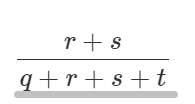

In [21]:
def dissimilarity_binary_symetric_distance(probality_value):
  
    return (probality_value["r"] + probality_value["s"]) / (probality_value["q"] + probality_value["r"] + probality_value["s"] + probality_value["t"])

In [22]:
dimensi_1_2 = dissimilarity_binary_symetric_distance(probality_d_1_2)
dimensi_1_3 = dissimilarity_binary_symetric_distance(probality_d_1_3)
dimensi_1_4 = dissimilarity_binary_symetric_distance(probality_d_1_4)

In [23]:
#d1 dan d2

dimensi_1_2

0.0

In [24]:
# d1 dan d4

dimensi_1_3

0.0

In [25]:
# d1 dan d4

dimensi_1_4

0.0